<a href="https://colab.research.google.com/github/robertomoragad/Estadistica/blob/master/Calculo_de_poder_Experimento_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Importamos librerias de la siguiente forma: 
import numpy as np # importando numpy
from scipy import stats # importando scipy.stats
import matplotlib.pyplot as plt #importando matplotlib
import pandas as pd #pandas

**Cálculo del poder**

En este ejemplo vamos a mostrar como se calcula el poder, imagenemos que nosotros trabajamos en una compañía que desarrolla un producto de marketing digital, y nuestra promesa de valor es ayudar a los clientes a incrementar el engagement con sus clientes. Para este fin pondremos en un prestigioso cliente nuestro producto estrella.

Para evaluar el engagement nuestro prestigioso cliente mide la cantidad de minutos que pasan al día sus clientes en su plataforma, actualmente el cliente (con su actual modelo de servicio) exhibe un tiempo de actividad media de sus clientes por día igual a 200 minutos, con una desviación estandar de 35 minutos.

Esta será nuestra hipotésis nula:  H0:  μ = 200 min

Llevaremos a cabo un experimento para ver si nuestros producto produce un engagement mejor que el actual exhibido por nuestro cliente, pero nuestro cliente nos indica que solamente podemos realizar el tratamiento con un total de 50 de sus clientes, los que serán escogidos de forma aleatoria.

Con base en lo anterior plantearemos las siguientes hipótesis a contrastar (1 cola):

* H0 :  μ = 200 min.
* H1 :  μ > 200 min.

Vamos a presetear un valor alpha de 0.01 (error tipo I).


En el siguiente procedimiento apoyados en python vamos a calcular el valor de Z crítico y su valor correspondiente en promedio de minutos.  El valor que obtendremos en esta operación corresponderá al promedio en minutos mínimo desde donde la media muestral será considera que cae en la zona de rechazo de la hipótesis nula.  En otras palabras, si la media que se obtenga con los 50 clientes del estudio supera este valor, estaremos rechazando la hipotesis nula. 

In [41]:
#Cargamos data línea base
Mu = 200
Sigma = 35

#tamaño de muestra del tratamiento
n = 50

# 1) Definir hipotesis a contrastar (prueba unilateral - cola derecha)
alpha = 0.01

#H0:   Mu = 200
#H1:   Mu >  200 


# 2) buscar valor critico de Z
Zcritico = stats.norm.ppf(1-alpha)# 1 cola
print('Z critico: ', Zcritico)


#3 ) calcular el valor en minutos correspondiente al Z critico
valor_minutos_zcritico= stats.norm(Mu, Sigma/np.sqrt(n)).ppf(1-alpha)
print("Valor media para Z critico: ", valor_minutos_zcritico)

Z critico:  2.3263478740408408
Valor media para Z critico:  211.5148344999323


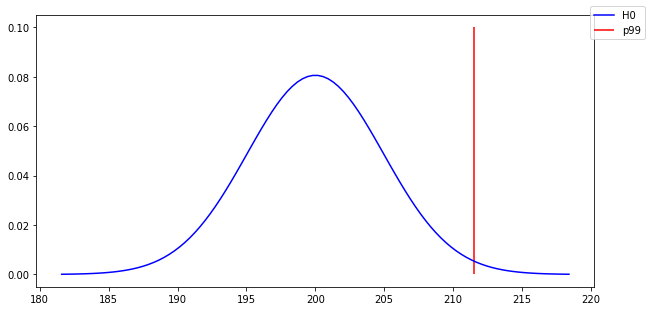

In [42]:
#visualizando la distribucion de las medias muestrales y limites

#proyectar distribucion H0
muestral_z = stats.norm(Mu, Sigma / np.sqrt(n))
x_z = np.linspace(muestral_z.ppf(0.0001), muestral_z.ppf(0.9999), 100)
pdf_z = muestral_z.pdf(x_z) #funcion densidad probabilidad

plt.figure(figsize=(10, 5)) #tamaño grafico
plt.plot(x_z, pdf_z,"b") #medias H0
plt.vlines(ymin=0, ymax=0.1, x=valor_minutos_zcritico,  colors='r')#valor_libra_zcritico
plt.legend(['H0', 'p99','xbar'],bbox_to_anchor=(1.1,1.05))
plt.show()

De acuerdo a conversaciones con el cliente y expertos en la materia, se ha definido que si nuestro producto mejora el engagement en al menos 15 minutos, esto será considerado como un efecto de negocio relevante.  Por tanto el tamaño del efecto que utilizaremos para proceder a calcular la Potencia será de 15 minutos.

Tamaño del efecto = 15 minutos.

Ahora tendremos las siguientes hipótesis:

* H0:  μ = 200 min
* H1:  μ = 215 min


Para calcular la Potencia de la prueba, primero procederemos a calcular el Beta (error tipo II), lo haremos con python en el siguiente procedimiento:


In [33]:
efecto = 15 #tamaño del efecto
H1= Mu + efecto

## Calcular la potencia de la prueba (1 - beta)

#calcular el valor en minutos correspondiente al Z critico
valor_minutos_zcritico= stats.norm(Mu, Sigma/np.sqrt(n)).ppf(1-alpha)
print("Valor media para Z critico: ", valor_minutos_zcritico)

#Calcular Beta (error tipo II)
#forma simple con Scipy
beta = stats.norm(H1, Sigma/np.sqrt(n)).cdf(valor_minutos_zcritico)
print('Beta: ',beta)

#Calcular Potencia estadística (1- beta)
print('Potencia de la prueba: ', 1-beta)

Valor media para Z critico:  211.5148344999323
Beta:  0.2406822113563845
Potencia de la prueba:  0.7593177886436155


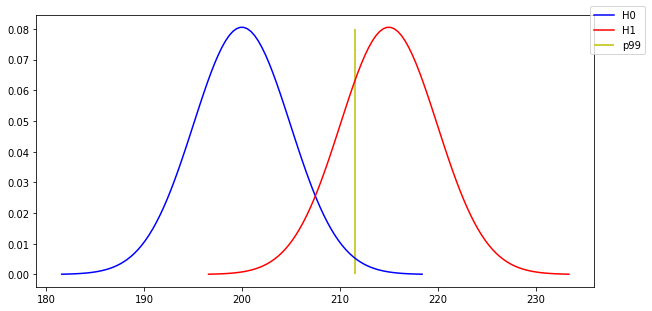

In [43]:
#visualizando
#proyectar distribucion H0
h0_z = stats.norm(Mu, Sigma / np.sqrt(n))
x0_z = np.linspace(h0_z.ppf(0.0001), h0_z.ppf(0.9999), 100)
pdf0_z = h0_z.pdf(x0_z) #funcion densidad probabilidad

#proyectar distribucion H1
h1_z = stats.norm(H1, Sigma / np.sqrt(n))
x1_z = np.linspace(h1_z.ppf(0.0001), h1_z.ppf(0.9999), 100)
pdf1_z = h1_z.pdf(x1_z) #funcion densidad probabilidad

plt.figure(figsize=(10, 5)) #tamaño grafico
plt.plot(x0_z, pdf0_z,"b") #medias H0
plt.plot(x1_z, pdf1_z,"r") #medias H1
plt.vlines(ymin=0, ymax=0.08, x=valor_minutos_zcritico,  colors='y')#valor_minutos_zcritico
plt.legend(['H0', 'H1','p99'],bbox_to_anchor=(1.1,1.05))
plt.show()

In [45]:
from statsmodels.stats.power import tt_solve_power

tt_solve_power(effect_size=efecto/Sigma, nobs=None, alpha=alpha, power=0.90, alternative='larger')

73.60661303694864

In [46]:
from statsmodels.stats.power import tt_solve_power

tt_solve_power(effect_size=16/Sigma, nobs=40, alpha=alpha, power=None, alternative='larger')

0.6787087534467986

In [35]:
#estimar tamaño de muestra con analisis de Potencia
from statsmodels.stats.power import TTestIndPower


#definir parametros para el analisis
sigma = 24
efecto_bruto = 10 #criterio relevancia experto
tamano_efecto = (efecto_bruto / sigma) #efecto estandarizado d Cohen
print('Tamaño del efecto d Cohen: ', tamano_efecto)
alpha = 0.01
potencia = 0.732348

#ejecuta analisis
analysis = TTestIndPower()
result = analysis.solve_power(tamano_efecto, power=potencia, nobs1=None, ratio=1.0, alpha=alpha, alternative='larger')
print('Sample Size: %.3f' % result)

Tamaño del efecto d Cohen:  0.4166666666666667
Sample Size: 101.364
